In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('D:\spotify-2023.csv', encoding='ISO-8859-1')

In [3]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [4]:
df.shape

(953, 24)

In [5]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [6]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [7]:
df["in_shazam_charts"]=df["in_shazam_charts"].fillna(df["in_shazam_charts"].mode()[0])

In [8]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
df["key"]=df["key"].fillna(df["key"].mode()[0])

In [10]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

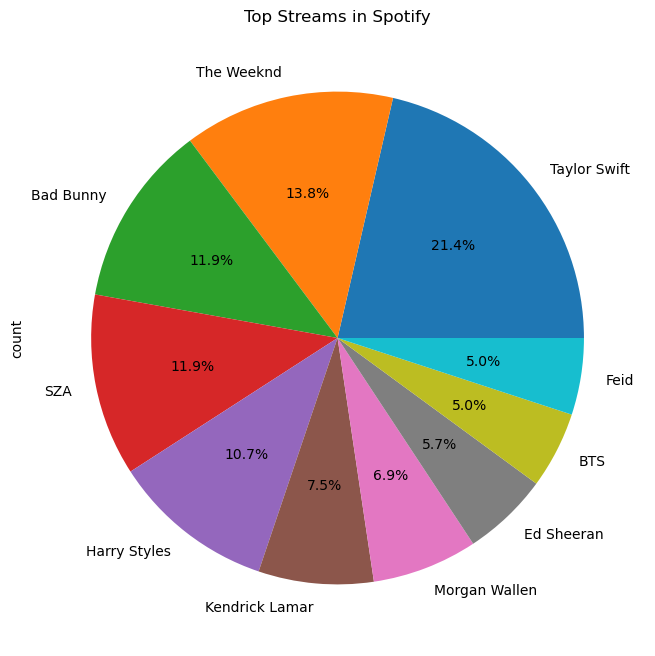

In [11]:
songs = df['artist(s)_name'].value_counts()
songs.nlargest(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Top Streams in Spotify')
plt.show()

<Axes: title={'center': 'playlist streams'}>

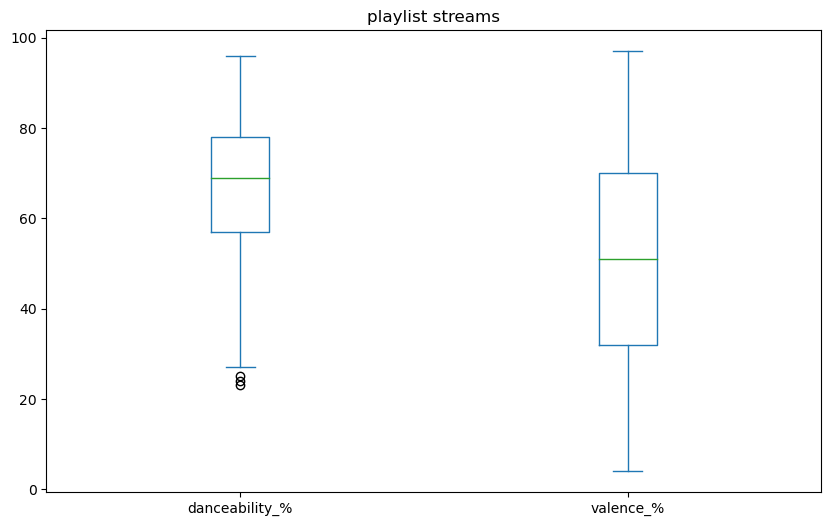

In [12]:
df[['danceability_%','valence_%']].plot(kind='box',title='playlist streams',figsize=(10,6))

<Axes: title={'center': 'Box Plot for Outliers Detection'}>

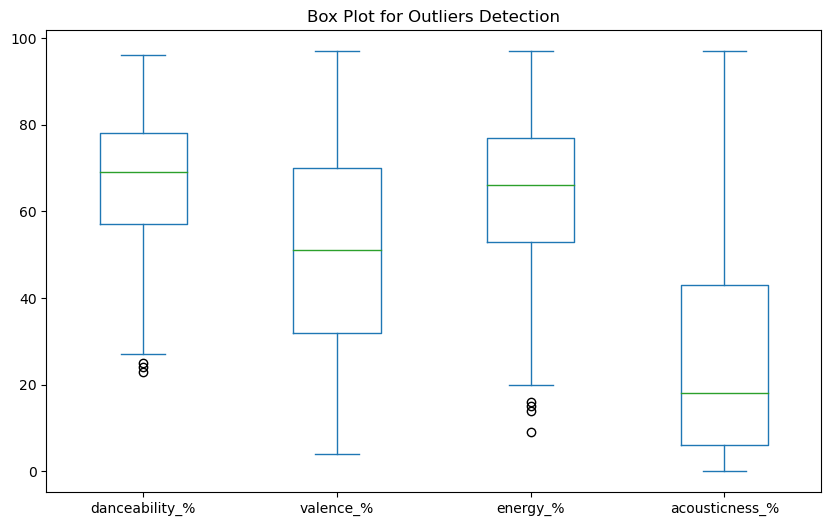

In [13]:
df[['danceability_%','valence_%','energy_%','acousticness_%']].plot(kind='box', figsize=(10,6), title='Box Plot for Outliers Detection')


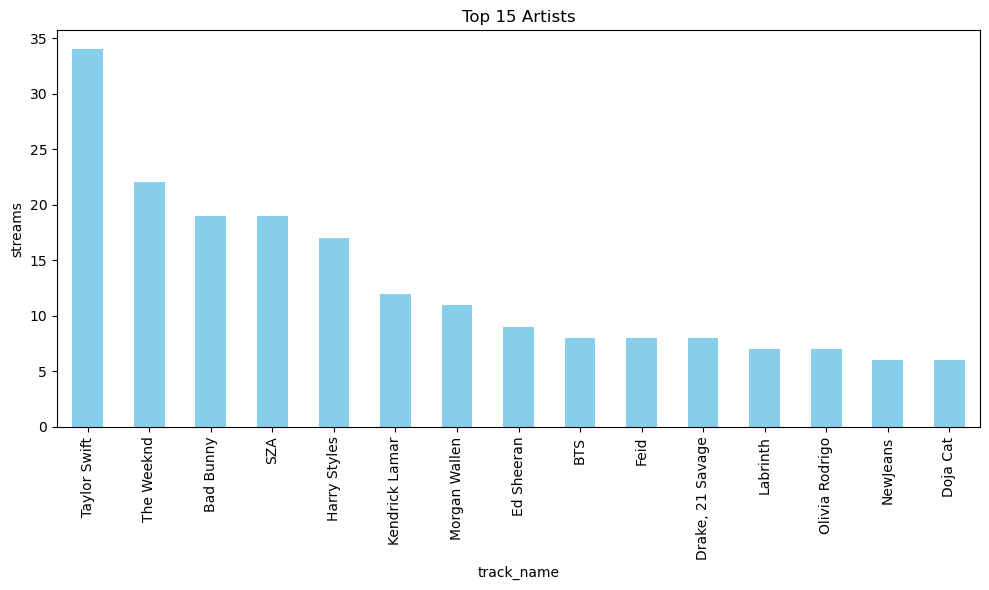

In [14]:
artists=df['artist(s)_name'].value_counts()
top_15_artists=artists.nlargest(15)
plt.figure(figsize=(10, 6))
top_15_artists.plot(kind='bar', color='skyblue')
plt.title('Top 15 Artists')
plt.xlabel('track_name')
plt.ylabel('streams')
plt.tight_layout()
plt.show()

C:\Users\sampr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


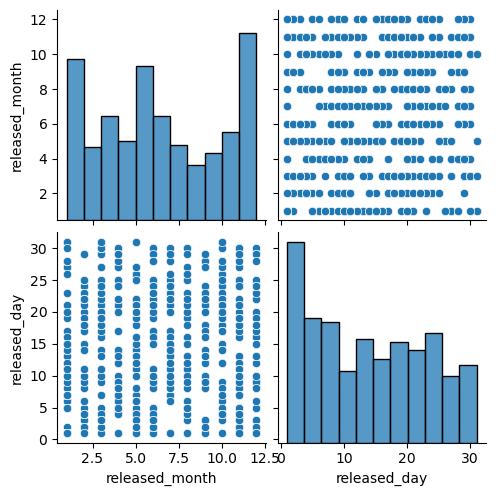

In [16]:
sns.pairplot(df[['released_month', 'released_day']].dropna())
plt.show()

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.head(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('artists')
plt.show()

ValueError: could not convert string to float: 'Seven (feat. Latto) (Explicit Ver.)'

<Figure size 1000x600 with 0 Axes>

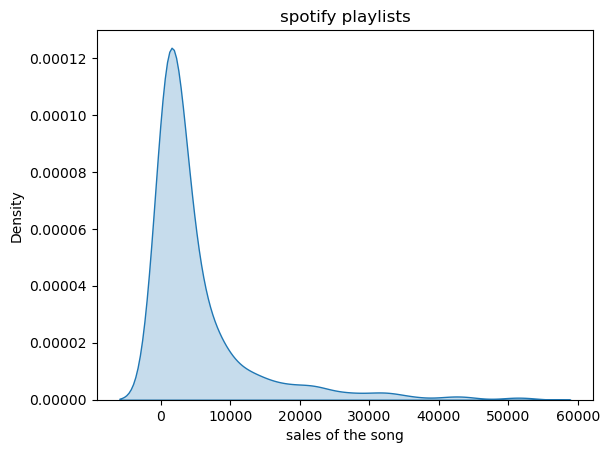

In [24]:
sns.kdeplot(df['in_spotify_playlists'], fill=True)
plt.title('spotify playlists')
plt.xlabel('sales of the song')
plt.show()

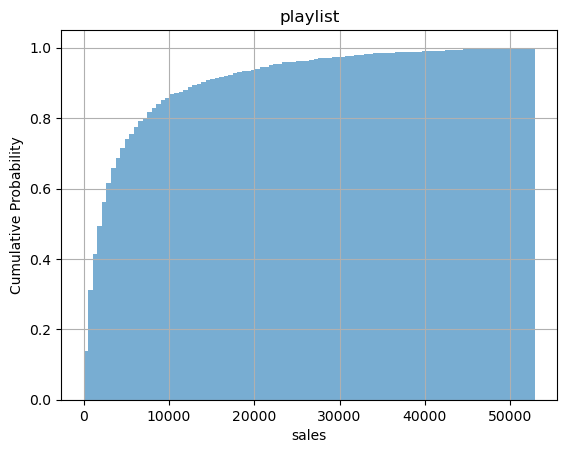

In [23]:
df['in_spotify_playlists'].hist(cumulative=True, density=True, bins=100, alpha=0.6)
plt.title('playlist')
plt.xlabel('sales')
plt.ylabel('Cumulative Probability')
plt.show()
